In [272]:
import pandas as pd
import numpy as np 
from my_func import ds_func
import seaborn as sns
from matplotlib import pyplot as plt
ds=ds_func()
# import warnings
# warnings.filterwarnings("ignore")

In [273]:
df = pd.read_csv('DIAssignment.csv')

df= df.drop('Unnamed: 0',axis=1)

## study how the mileage is influenced by the other attributes of the vehicle


## Investigation of structure, quality and content

Overall, the EDA approach is very iterative. At the end of every investigation we might discover something that will require us to redo everything once more. That is normal! But to impose at least a little bit of structure, I will be following few steps for investigations:

1. **Structure investigation**: Exploring the general shape of the dataset, as well as the data types of data features.
2. **Quality investigation**: Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.
3. **Content investigation**: Once the structure and quality of the dataset is understood, we can go ahead and perform a more in-depth exploration on the features values and look at how different features relate to each other.


#### Structure Investigation

Before looking at the content of our independant variables $X$, let's first look at the general structure of the dataset. For example, how many columns and rows does the dataset have?

In [274]:
df.shape

(2848, 7)

So we know that this dataset has 2848 samples and 7 features. And how many different data types do these 7 features contain?

In [275]:
pd.value_counts(df.dtypes)

object     3
int64      2
float64    2
dtype: int64

In [276]:
short_cols=['dtype','nulls','num_uniques','value_counts','value_counts_p']
ds.tbl_report(df,cols=short_cols,card=20)

Table Shape (2848, 7)


,dtype,nulls,num_uniques,value_counts,value_counts_p
bike_id,object,0,2848,NA,NA
age_scaled,float64,0,38,NA,NA
model_type,object,0,4,Model_4:1982Model_3:437Model_2:291Model_1:138,Model_4:0.696Model_3:0.153Model_2:0.102Model_1:0.048
no_of_riding_sessions,int64,0,1514,NA,NA
no_of_charging_sessions,int64,0,350,NA,NA
charging_behavior,object,0,3,Decent:1816Bad:520Good:512,Decent:0.638Bad:0.183Good:0.18
mileage_km_per_soc,float64,0,2848,NA,NA


In [277]:
df.describe()

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc
count,2848.000000,2848.000000,2848.000000,2848.000000
mean,0.213617,895.797402,108.694522,0.886865
std,0.206463,604.446765,81.673720,0.143127
min,0.000000,6.000000,3.000000,0.001655
25%,0.071429,449.000000,48.000000,0.806110
50%,0.142857,759.000000,93.000000,0.878671
75%,0.309524,1216.000000,144.000000,0.957420
max,0.976190,5140.000000,762.000000,1.979403


Looking at the above summary report, we now know all the samples are unique bike_id's, age of the bike is scaled between 0-1, 4 model types contain 69.6% of model_4, mean no of riding sessions are 896 with standard deviation of 604, mean no of charging sessions being 109 with standard deviation of 81 and 63% of charging behavior is descent. Our respose attribute mileage mean is 0.88


#### Structure of non-numerical features

Data types can be numerical and non-numerical. First, let's take a closer look at the **non-numerical** entries.

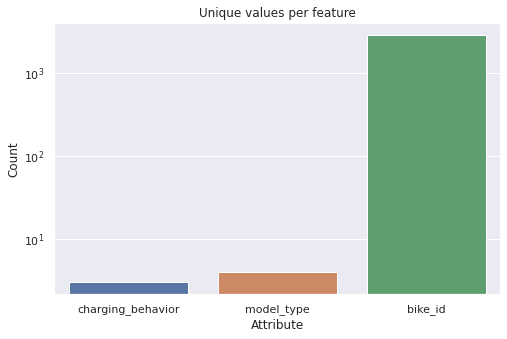

In [278]:
# For each non-numerical feature compute number of unique entries
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

# Plot information with y-axis in log-scale
plt.figure(figsize=(8,5))
ax=sns.barplot(x=unique_values.index,y=unique_values.values)
ax.set_yscale("log")
_ = ax.set(title="Unique values per feature",xlabel="Attribute", ylabel="Count")

#### Structure of non-numerical features

Data types can be numerical and non-numerical. First, let's take a closer look at the **numerical** entries.

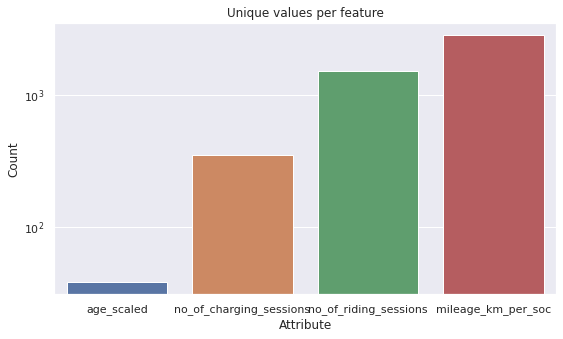

In [279]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
plt.figure(figsize=(9,5))
ax=sns.barplot(x=unique_values.index,y=unique_values.values)
ax.set_yscale("log")
_ = ax.set(title="Unique values per feature",xlabel="Attribute", ylabel="Count")
plt.show()

####  Conclusion of structure investigation

At the end of this first investigation, we have a better understanding of the general structure of our dataset. Number of samples and features, what kind of data type each feature has, and how many of them are binary, ordinal, categorical or continuous. 

#### 2. Quality Investigation

Before focusing on the actual content stored in these features, let's first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

####  Duplicates

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or recording time that is unique to each new sample) which we might want to ignore first.

In [280]:
# Check number of duplicates while ignoring the dependant feature
n_duplicates = df.drop(labels=["mileage_km_per_soc"], axis=1).duplicated().sum()
print(f"We have {n_duplicates} duplicates in the database.")

#  Extract column names of all features
columns_to_consider = df.drop(labels=["mileage_km_per_soc"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape


We have 0 duplicates in the database.


(2848, 7)

#### Missing values

Another quality issue worth to investigate are missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

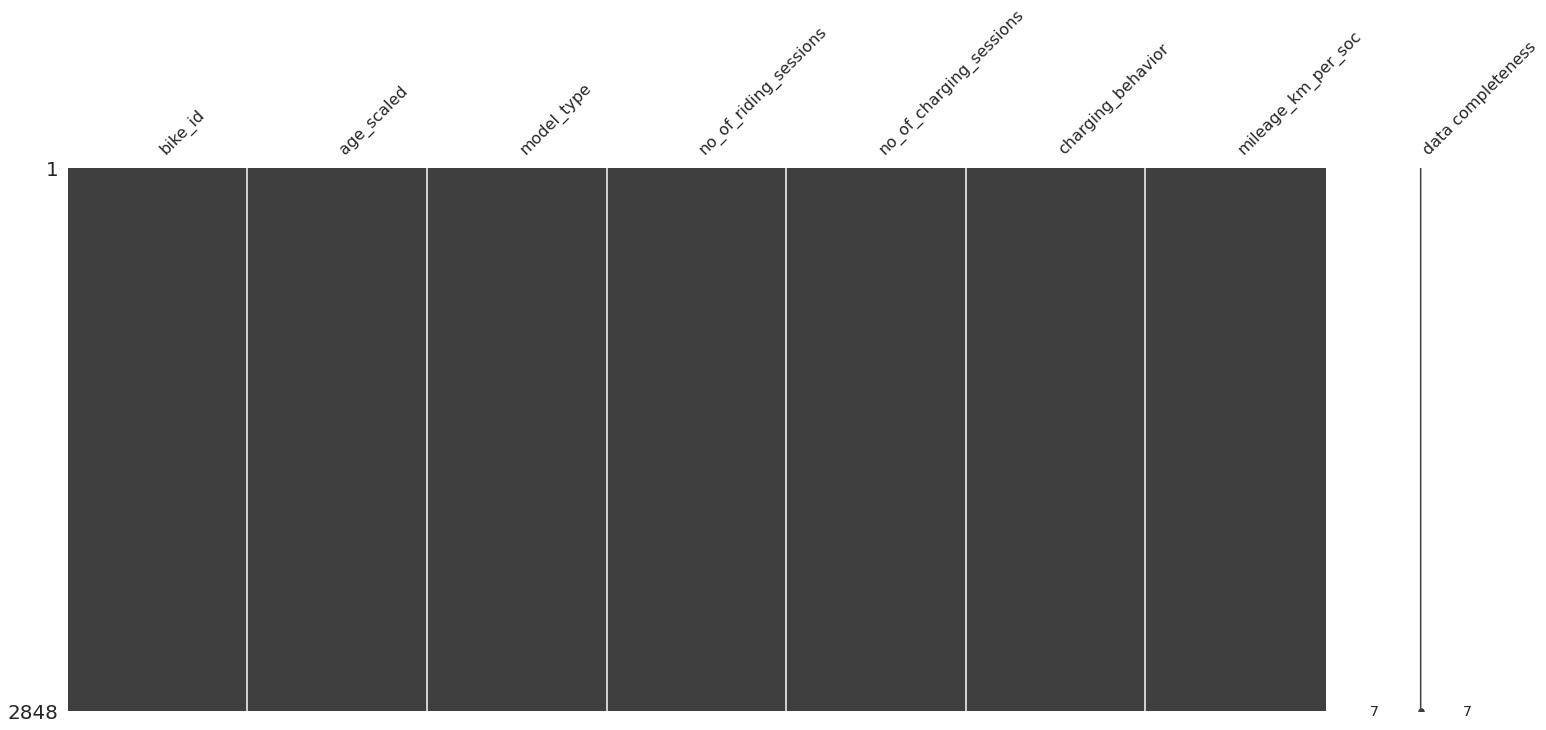

In [281]:
import missingno as msno

msno.matrix(df,labels=True, sort="descending");

From the above plot we can conclude that there are no missing values 

#### Unwanted entries and recording errors

Another source of quality issues in a dataset can be due to unwanted entries or recording errors. It’s important to distinguish such samples from simple outliers. While outliers are data points that are unusual for a given feature distribution, unwanted entries or recording errors are samples that shouldn’t be there in the first place.

Of course, detecting such errors and unwanted entries and distinguishing them from outliers is not always straight forward and depends highly on the dataset. One approach to this is to take a global view on the dataset and see if we can identify some very unusual patterns.

#### Numerical features
To plot this global view of the dataset, at least for the numerical features we can use the plot function 

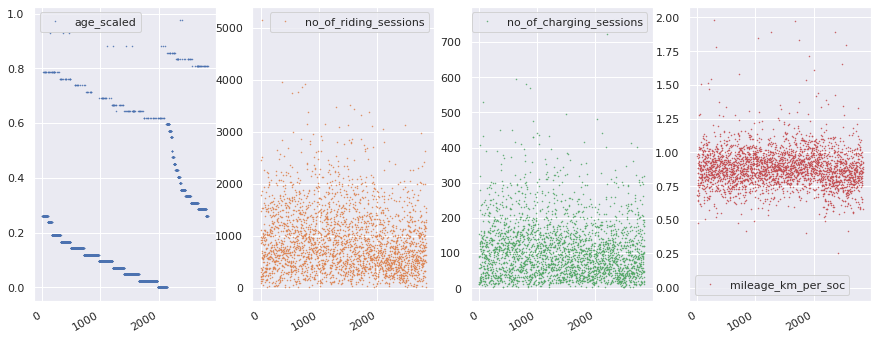

In [282]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 6), markersize=1);

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index. These kind of plots can give us a lot of ideas for data cleaning and EDA. Usually it makes sense to invest as much time as needed until we’re happy with the output of this visualization.

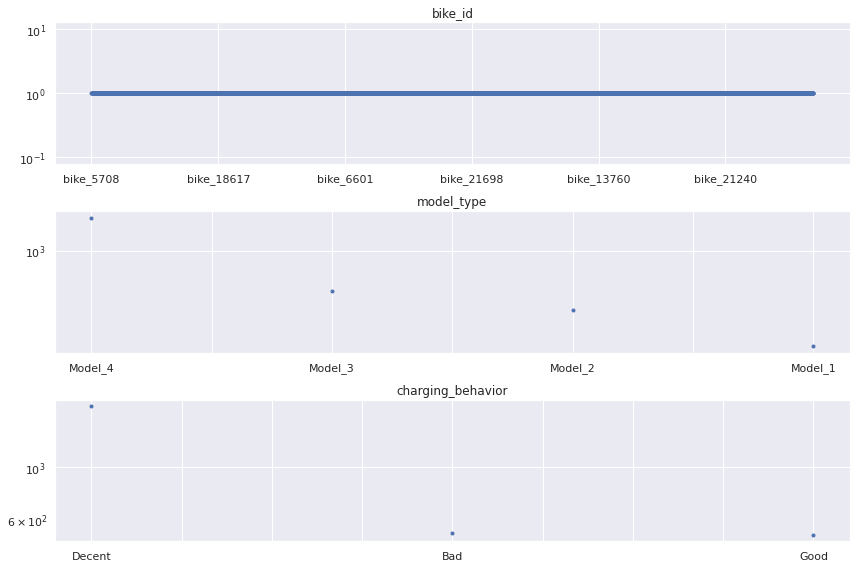

In [283]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    df_non_numerical[col].value_counts().plot(
        logy=True,title=col,lw=0,marker='.',ax=ax)
plt.tight_layout();

We can see that bike_id are all unique and model_4 and charging behaviour Descent has greater than 1000 records

##### Conclusion of quality investigation

At the end of this second investigation, we have a better understanding of the general quality of our dataset. We looked at duplicates, missing values and unwanted entries or recording errors.

## Content Investigation
Up until now we only looked at the general structure and quality of the dataset. Let’s now go a step further and take a look at the actual content. In an ideal setting, such an investigation would be done feature by feature. But this becomes very cumbersome once you have more than 20–30 features.

We will explore three different approaches that can give us a very quick overview of the content stored in each feature and how they relate.

#### Feature distribution
Looking at the value distribution of each feature is a great way to better understand the content of data. Furthermore, it can help to guide EDA, and provides a lot of useful information with regards to data cleaning and feature transformation. The quickest way to do this for numerical features is using histogram plots. 

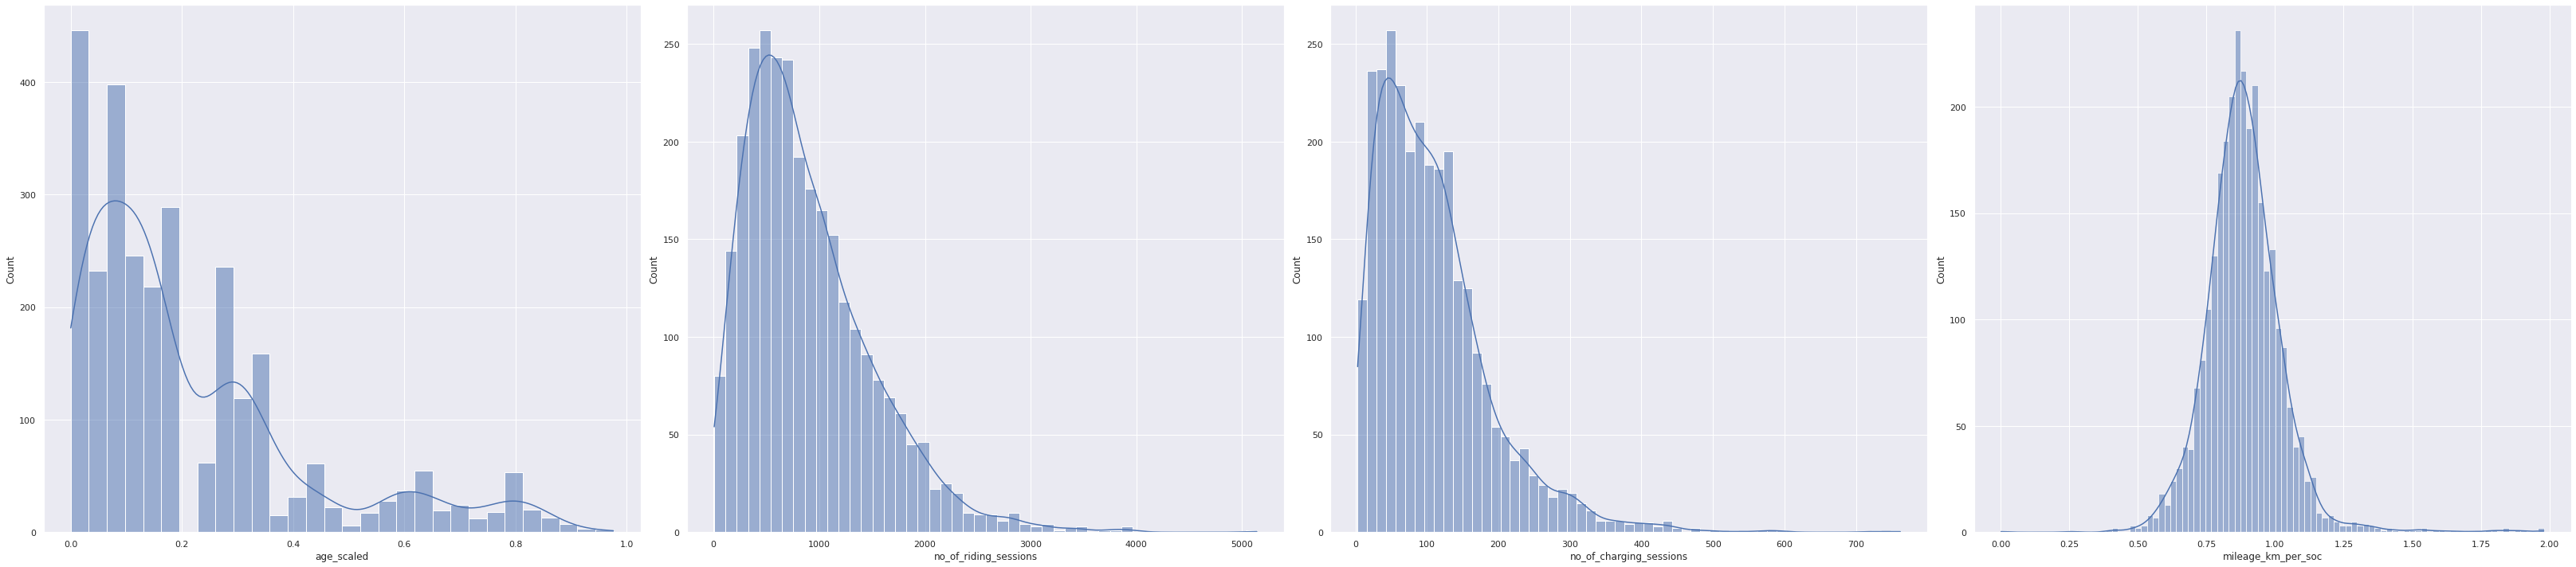

In [284]:
# Plots the histogram for each numerical feature in a separate subplot
fig, axes = plt.subplots(ncols=len(df.select_dtypes(include='number').columns), figsize=(45,10))
for ax, col in zip(axes, df.select_dtypes(include='number').columns):
    sns.histplot(df[col],kde=True, ax=ax)
    plt.tight_layout() 
plt.show()

From the above graph we can observe that the age_scaled has multi-modal distribution, Mileage is normally distributed, where as ridinging sessions and charging sessions are riht skewed in that case you might want to think about how you can transform these values to make them more normal distributed. For example, for right skewed data you could use a log-transformation.



### Feature patterns

Next step on the list is the investigation of feature specific patterns. The goal of this part is two fold:

Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?

Can we identify particular relationships between features that will help us to better understand our dataset?

While there are many ways we could explore our features for particular patterns, let’s simplify our option by deciding that we treat features with less than 25 unique features as discrete or ordinal features, and the other features as continuous features.



In [285]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

In [286]:
cols_continuous

age_scaled                 True
no_of_riding_sessions      True
no_of_charging_sessions    True
mileage_km_per_soc         True
dtype: bool

#### Continuous features

Now that we have a way to select the continuous features, let’s go ahead and visualize the relationships between these features.

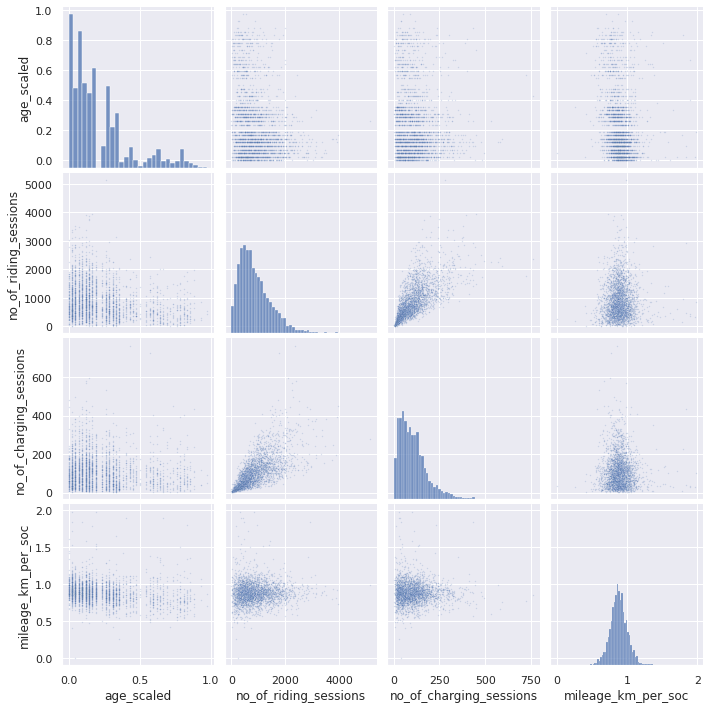

In [287]:
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape
sns.pairplot(df_continuous, height=2.5,plot_kws={"s": 2, "alpha": 0.2})


__Expected linear relationship with no_of_charging_session and no of riding. If we draw a best fit line for these two linear relationship, we start looking deeper into charging behaviour of those users who lie above the best fit line and study the effects of such charging pattern.__

lets try fitting the best fit line between charging sessions and riding sessions

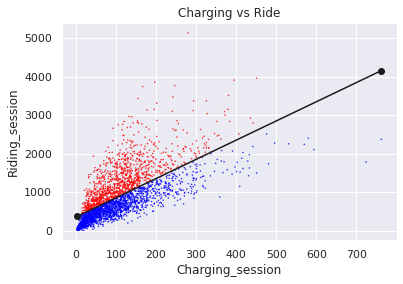

In [288]:
# create lambda function to check if points lie above or below the line 
isabove = lambda p, a,b: np.cross(p-a, b-a) < 0
k,v=np.polyfit(df['no_of_charging_sessions'],df['no_of_riding_sessions'],1)
a=np.array([df['no_of_charging_sessions'].min(),sorted(np.array(k*df['no_of_charging_sessions']+v))[-0]])
b=np.array([df['no_of_charging_sessions'].max(),sorted(np.array(k*df['no_of_charging_sessions']+v))[-1]])
p = np.array([df['no_of_charging_sessions'].values,df['no_of_riding_sessions'].values]).T
plt.plot([a[0],b[0]],[a[1],b[1]], marker="o", color="k")
plt.scatter(p[:,0],p[:,1],c=isabove(p,a,b), cmap="bwr",s=0.2)
plt.xlabel('Charging_session')
plt.ylabel('Riding_session')
plt.title('Charging vs Ride')
plt.show();

This also shows us that these variables are not corelated

In [289]:
df['a/b']=isabove(p,a,b)
df['a/b'].value_counts(normalize=True)

False    0.607093
True     0.392907
Name: a/b, dtype: float64

from the percentage of data in the classification of above the best fit line we can observe that 60% of data lie below the best fit line

In [290]:
df[df['a/b']==False].describe()

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc
count,1729.000000,1729.000000,1729.000000,1729.000000
mean,0.248699,593.823019,102.315789,0.881522
std,0.226623,377.607502,86.832552,0.152915
min,0.000000,6.000000,3.000000,0.001655
25%,0.071429,329.000000,39.000000,0.794711
50%,0.166667,519.000000,81.000000,0.872732
75%,0.333333,775.000000,137.000000,0.957583
max,0.976190,2512.000000,762.000000,1.979403


In [291]:
df[df['a/b']==True].describe()

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc
count,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.159411,1362.386953,118.550492,0.895119
std,0.155969,592.513964,71.922270,0.126146
min,0.000000,443.000000,16.000000,0.404011
25%,0.047619,935.500000,64.000000,0.820684
50%,0.119048,1266.000000,108.000000,0.885890
75%,0.190476,1681.500000,152.000000,0.956566
max,0.880952,5140.000000,451.000000,1.845379


By looking at the minimum value of no of riding sessions we can say that the split data above and below the best fit line is accurate 

From this we can confirm that ther is a huge cluster of users who lie in the lower half of the best fit line when 1 degree poly line is fit for riding vs charging relationship








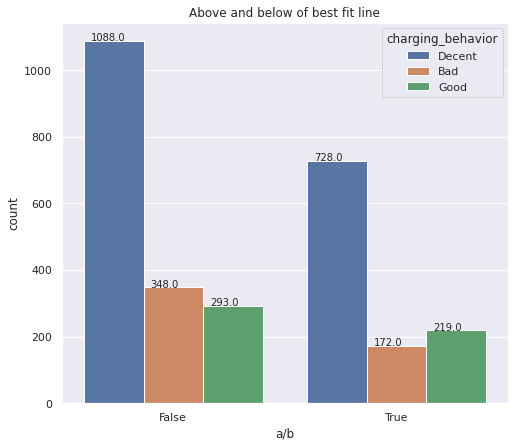

In [292]:
df['a/b']=isabove(p,a,b)

plt.figure(figsize=(8,7))
ax=sns.countplot(x='a/b',hue='charging_behavior',data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))
plt.title('Above and below of best fit line')
plt.show()

In [293]:
df[df['a/b']==True]['charging_behavior'].value_counts(normalize=True)

Decent    0.650581
Good      0.195710
Bad       0.153709
Name: charging_behavior, dtype: float64

In [294]:
df[df['a/b']==False]['charging_behavior'].value_counts(normalize=True)

Decent    0.629265
Bad       0.201272
Good      0.169462
Name: charging_behavior, dtype: float64

The above exploration we can observe that users who probably use the vehicle less frequently have a higher chance of not charging them in a good manner. One train of thought on this is that they might have fewer charging port access or they use them too less frequently that many times they drain to zero before recharging. For us to confirm this assumption we would require chagring time stamps, charging start and end values: this is to understand the charging pattern, if they are charging between 20-80% and we have classified such patterns as good charging practice, does it prolong battery life and also another parameter we would like to be interested in looking at would be charging_facility_usage binomial variable,which would give clarity on if it is used in appartments where there are no EV charging facility and they would be using the facilities of common charging locations. 

#### Feature relationships

Last, but not least, let’s take a look at relationships between features. More precisely how they correlate.

Depending on the dataset and the kind of features (e.g. ordinal or continuous features) you might want to use the spearman method instead of the pearson method to compute the correlation. Whereas the Pearson correlation evaluates the linear relationship between two continuous variables, the Spearman correlation evaluates the monotonic relationship based on the ranked values for each feature. And to help with the interpretation of this correlation matrix, let's use seaborn's .heatmap() to visualize it.

In [295]:
corr_df= df.iloc[:,1:].copy()

We will convert the categorical variable to ordinal data instead of one-hot encoding as we can establish a relationship for the order. For model_type we may assume that higer the model number more recent the model_type and possibly newer model and for charging behaviour we can easily establish a order as we can ditinguish bad to be lowest order and good to be the highest order on the response variable mileage. 

In [296]:
corr_df.charging_behavior.value_counts()

Decent    1816
Bad        520
Good       512
Name: charging_behavior, dtype: int64

In [297]:
# For readabiliy we will write a fuction to convert values to ordinal data
def ordinal_charging(row):
    if row=='Bad':
        return 1
    elif row=='Decent':
        return 2
    elif row=='Good':
        return 3

def ordinal_model(row):
    if row=='Model_4':
        return 4
    elif row=='Model_2':
        return 3
    elif row=='Model_3':
        return 2
    else:
        return 1 

here we are considerin model_1 to be highest order as we are assuming bad to be of the highest order, hence older models I would like to classify them in descending order

In [298]:
# apply the function to change categorical variable to ordinal 
corr_df['model_type']=  corr_df['model_type'].apply(ordinal_model)

corr_df['charging_behavior']=corr_df['charging_behavior'].apply(ordinal_charging)

3 is good in charging behavior and 4 is model type model_4

Now that we have converted the categorial variables to ordinal values we can use Spearman correlation which evaluates the monotonic relationship based on the ranked values for each feature

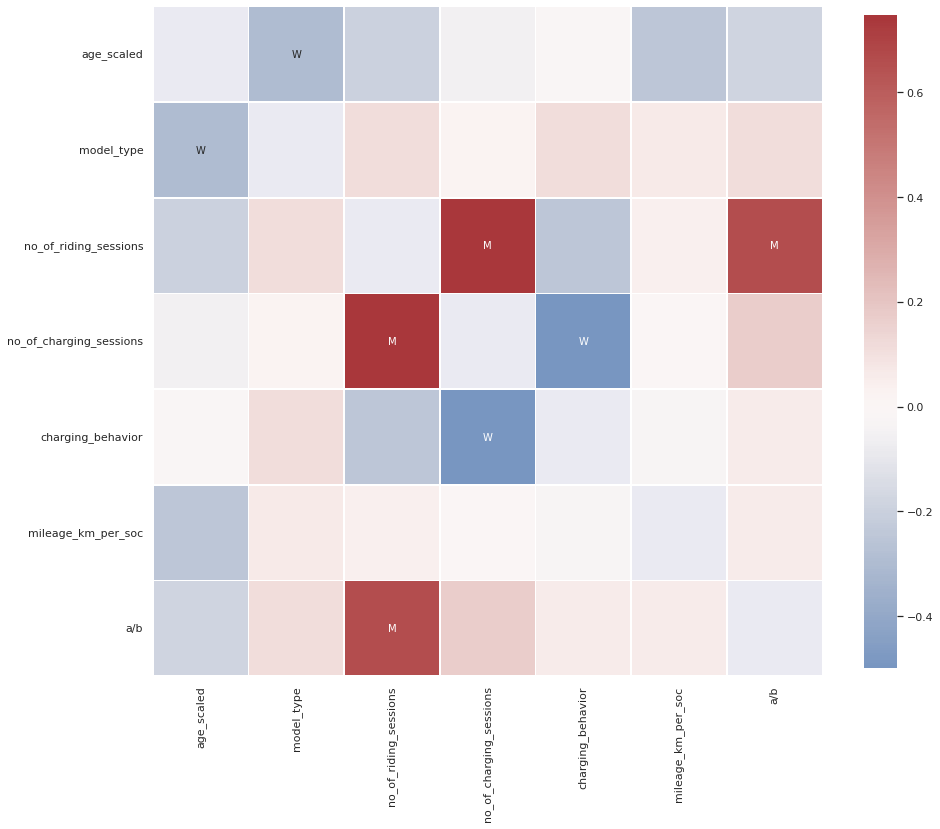

In [299]:
# Computes feature correlation
df_corr = corr_df.corr(method="spearman")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

This looks already very interesting. We can see none of them have strong correlations among the features. Now, lets actually order all of these different correlations

In [300]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)


charging_behavior        no_of_charging_sessions   -0.497892
model_type               age_scaled                -0.294684
mileage_km_per_soc       age_scaled                -0.249732
charging_behavior        no_of_riding_sessions     -0.246179
no_of_riding_sessions    age_scaled                -0.192218
a/b                      age_scaled                -0.184640
no_of_charging_sessions  age_scaled                -0.051820
mileage_km_per_soc       charging_behavior         -0.032648
charging_behavior        age_scaled                -0.020198
mileage_km_per_soc       no_of_charging_sessions   -0.007478
no_of_charging_sessions  model_type                 0.024639
mileage_km_per_soc       no_of_riding_sessions      0.043129
a/b                      mileage_km_per_soc         0.057452
                         charging_behavior          0.059916
mileage_km_per_soc       model_type                 0.066427
no_of_riding_sessions    model_type                 0.112295
a/b                     

We dont find any highly correlated variables we can use these variables for modelling a regression with dependant variable mil

#### Conclusion of content investigation

At the end of this third investigation, we have a better understanding of the content in our dataset. We looked at value distribution, feature patterns and feature correlations. However, these are certainly not all possible content investigation and data cleaning steps we could do. Additional steps would for example be outlier detection and removal, feature engineering and transformation, and more.

A proper and detailed EDA takes time! It is a very iterative process that often makes us go back to the start, after we addressed another flaw in the dataset. It’s the reason why we often say that 80% of any data science project is data preparation and EDA.

## Modelling 

### Regression analysis

We will e using the corr_df created with ordinal data for regression analysis, if time permits, will compare one-hot encoded categorical variables with this models output

In [301]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = corr_df.drop(['mileage_km_per_soc','a/b'],axis=1)
# Choose the response variable 'y' 
y = corr_df.mileage_km_per_soc


### Histogram & box plot of the targets

<AxesSubplot:xlabel='mileage_km_per_soc'>

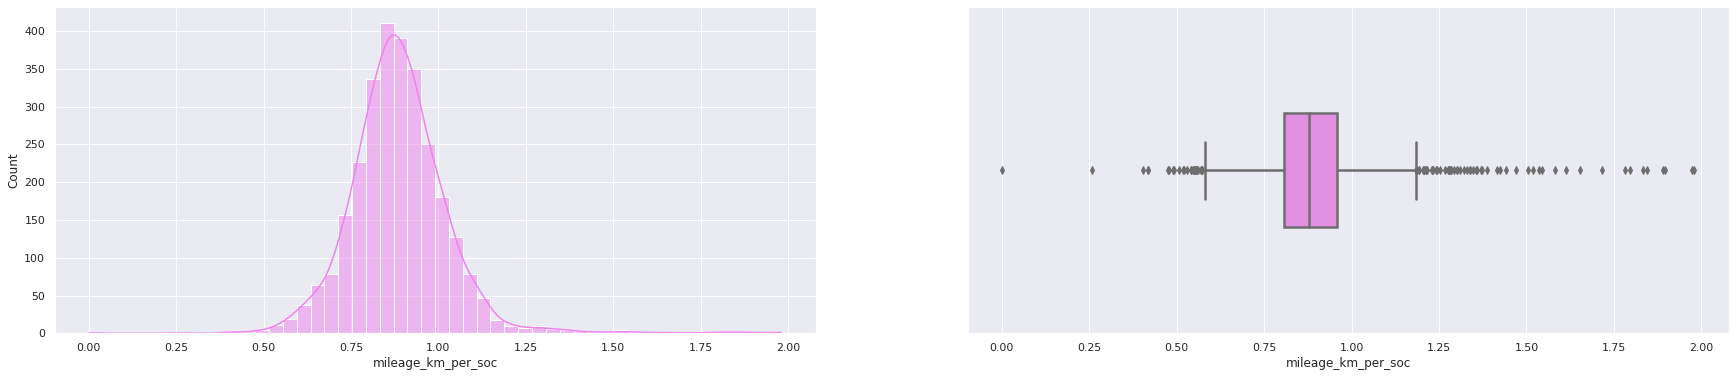

In [302]:
fig,ax = plt.subplots(1, 2, figsize=(30,6))
sns.set_theme()
sns.histplot(data=df,x='mileage_km_per_soc',ax=ax[0],kde=True,bins=50,color='violet')
sns.boxplot(data=df,x='mileage_km_per_soc',orient='h',ax=ax[1],linewidth=2.5,color='violet',width=0.35)
#sns.swarmplot(data=df,x='mileage_km_per_soc',ax=ax[1],color='.25',size=4) 

### Normal QQ plot for targets

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

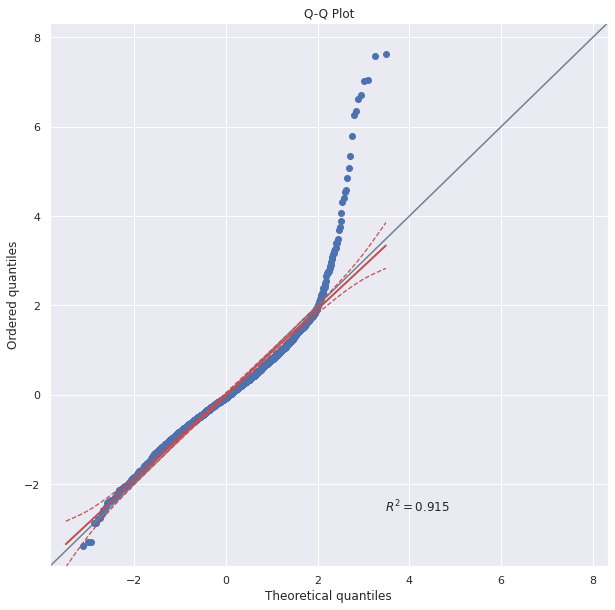

In [303]:
import pingouin as pg
fig, ax = plt.subplots(figsize=(10,10))
pg.qqplot(df.mileage_km_per_soc,dist='norm',ax=ax)

from the Q-Q plot and Distribution plot we can observe the target variable mileage is right skewed and 95% of the data fall within the normal distribution. 

<AxesSubplot:xlabel='no_of_charging_sessions', ylabel='mileage_km_per_soc'>

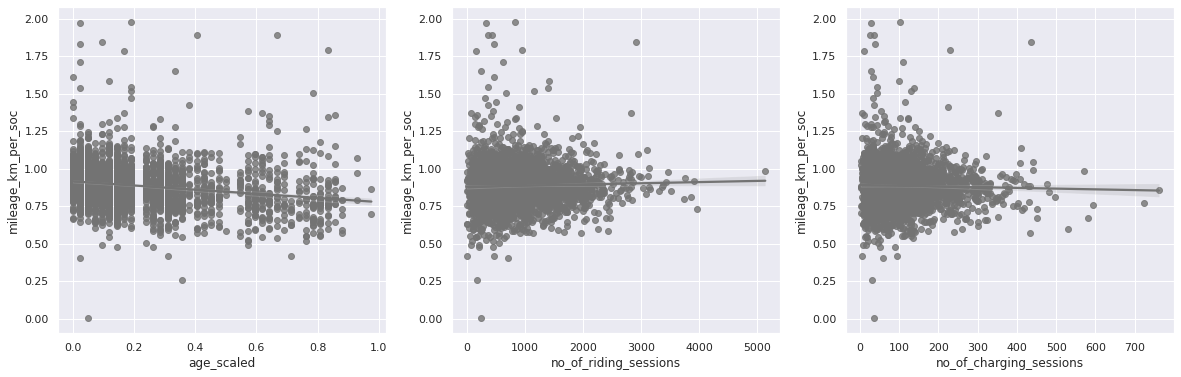

In [304]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.set_theme()
sns.regplot(data=df,x='age_scaled',y='mileage_km_per_soc',color='.45',ax=ax[0])
sns.regplot(data=df,x='no_of_riding_sessions',y='mileage_km_per_soc',color='.45',ax=ax[1])
sns.regplot(data=df,x='no_of_charging_sessions',y='mileage_km_per_soc',color='.45',ax=ax[2])

In [305]:
from itertools import combinations
col_combinations=[]
for i in range(1,5):
    cc = list(combinations(X.columns,i))
    col_combinations+=[list(cc[i]) for i in range(len(cc))]

column combinations were created to fit model on every possible combinations. This is not necessary but just to look how any variable adition will act on the MSE this is tested out. On large data sets this would be so helpfull

In [306]:
# Import necessary libraries
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline


In [307]:
# Initialize a list to store the MSE values
mse_list = []
r2score_list=[]

# List of all predictor combinations to fit the curve


# Loop over all the predictor combinations 
for i in col_combinations:

    # Set each of the predictors from the previous list as x
    x = X[i]
    
    # Set the "Sales" column as the reponse variable
    y = df['mileage_km_per_soc']
   
    # Split the data into train-test sets with 80% training data and 20% testing data. 
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data
    lreg.fit(x_train,y_train)
    
    # Predict the response variable for the test set using the trained model
    y_pred= lreg.predict(x_test)
    
    # Compute the MSE for the test data
    MSE = round(mean_squared_error(y_test,y_pred),5)
    
    # Append the computed MSE to the list
    mse_list.append(MSE)
    
    # Compute the R2 for the test data
    r2_ = round(r2_score(y_test,y_pred),5)
    
    # Append the computed MSE to the list
    r2score_list.append(r2_)


### Display the MSE with predictor combinations

In [308]:
# display the MSE for each predictor combination
t = PrettyTable(['Predictors', 'MSE','R2'])

for i in range(len(mse_list)):
    t.add_row([col_combinations[i],mse_list[i],r2score_list[i]])

print(t)


+-----------------------------------------------------------------------------------------+---------+----------+
|                                        Predictors                                       |   MSE   |    R2    |
+-----------------------------------------------------------------------------------------+---------+----------+
|                                      ['age_scaled']                                     | 0.01656 | 0.05739  |
|                                      ['model_type']                                     | 0.01749 | 0.00487  |
|                                ['no_of_riding_sessions']                                | 0.01771 | -0.00788 |
|                               ['no_of_charging_sessions']                               | 0.01754 | 0.00196  |
|                                  ['charging_behavior']                                  | 0.01768 | -0.00635 |
|                               ['age_scaled', 'model_type']                              | 0.01

The above can be used to decide the variables for model selection based on improvement of R2 score. 

'age_scaled', 'model_type', 'no_of_charging_sessions' had the lowest MSE. The addition of more variables after this combination had no effect on the models imporvement in MSE

$𝑅^2$ can be negative, it just means that:

The model fits your data very badly

we did not set an intercept

Put simply:

When 𝑅2<0, a horizontal line explains the data better than your model.

When 𝑅2=0, a horizontal line explains the data equally as well as your model.

In [309]:
## choosing the lowest MSE variables to check residuals
x = X[['age_scaled', 'model_type', 'no_of_charging_sessions']]
    
# Set the "Sales" column as the reponse variable
y = df['mileage_km_per_soc']

# Split the data into train-test sets with 80% training data and 20% testing data. 
# Set random_state as 0
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(x_train,y_train)

# Predict the response variable for the test set using the trained model
y_pred= lreg.predict(x_test)

# Compute the MSE for the test data
MSE = mean_squared_error(y_test,y_pred)

# compute residuals
residuals = y_test-y_pred

In [310]:
from statsmodels.regression import linear_model
X = corr_df[['age_scaled', 'model_type', 'no_of_charging_sessions']]
y = corr_df.mileage_km_per_soc
model = linear_model.OLS(y_train, x_train).fit()

In [311]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     mileage_km_per_soc   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          1.066e+04
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:45:50   Log-Likelihood:                          98.235
No. Observations:                2278   AIC:                                     -190.5
Df Residuals:                    2275   BIC:                                     -173.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age_scaled                  0.4603      0.021     22.101      0.000       0.419       0.501
model_type                  0.1997      0.002     86.760      0.000       0.195       0.204
no_of_charging_sessions     0.0006   5.72e-05     10.323      0.000       0.000       0.001
==============================================================================
Omnibus:                      379.059   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.017
Skew:                           1.000   Prob(JB):                    1.37e-163
Kurtosis:                       4.976   Cond. No.                         583.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So far, we assumed:

• linear relationship between X and Y

• the residuals $$\hat{𝑟} = 𝑦_i − \hat{y_i}$$  

were uncorrelated (taking the average of the square residuals to calculate the MSE 
implicitly assumed uncorrelated residuals)

These assumptions need to be verified using the data. This is often done by visually inspecting the residuals.

### Interaction variables in regression Model

Interaction variables are basically inclusion of variables in the regression model that are a product of two independant variables such as $X_1X_2$.Usually the interaction variables are product of continous variable and a categorical variable. The inclusion of INTERACTION VARIABLE enable us to check the existence of conditional relationship between the dependant variable and two independant variable

Since I dont have sufficient time to perform this will keep this section for future analysis

### Diagnostics: preds vs targets, preds vs residuals, targets vs residuals

Regression is often misused since the model fails to perfom necessary diagnostics test before applying the model. Before deployment it is necessary that the regression model created is validated for assumptions about normal distribution of residuals, homoscedasticity and functional form of the regression model

__For multi-regression, we plot the residuals vs predicted y, $\hat{y}$, since there are too many
x’s and that could wash out the relationship.__

### Check for Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

[Text(0.5, 0, 'Target'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'Targets vs Residuals')]

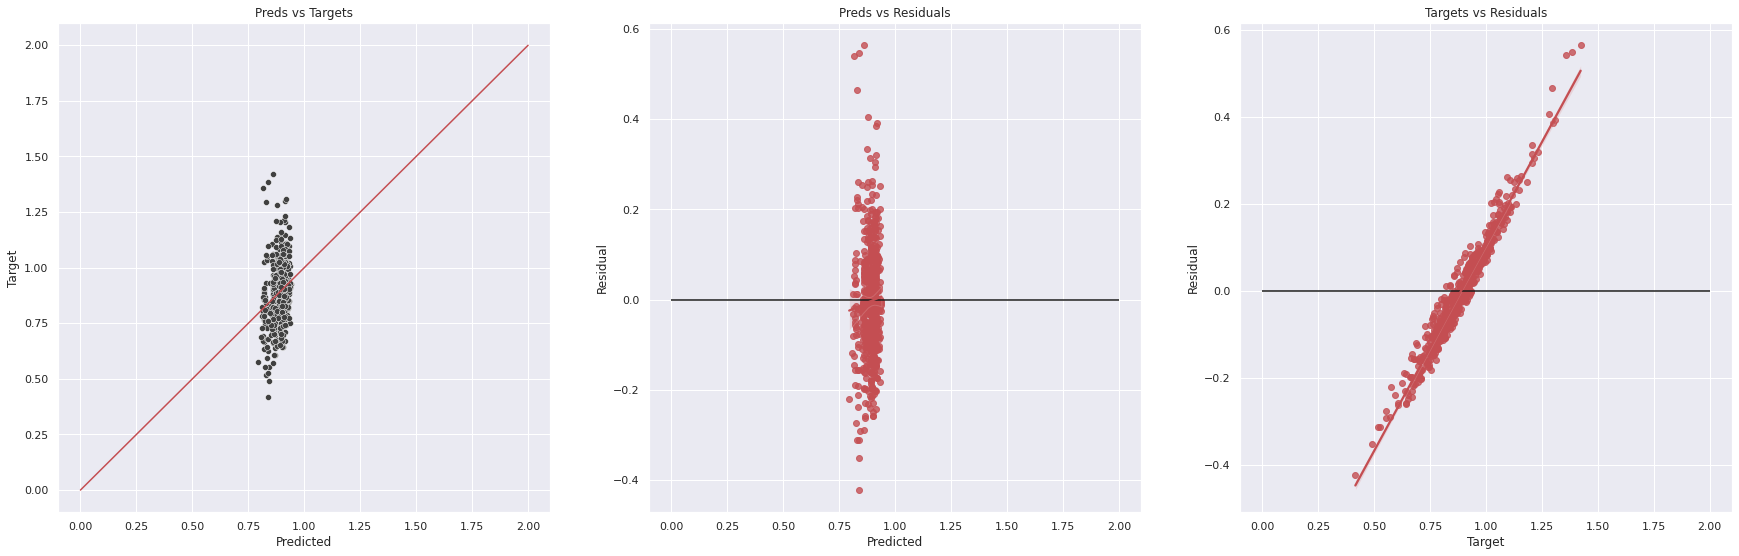

In [312]:
fig, ax = plt.subplots(1,3,figsize=(30,9))

sns.scatterplot(x=y_pred,y=y_test,color='.25',ax=ax[0])
ax[0].plot([0,2],[0,2],color='r')
ax[0].set(xlabel='Predicted',ylabel='Target',title='Preds vs Targets')

sns.regplot(x=y_pred,y=residuals,color='r',order=1,ax=ax[1])
ax[1].hlines(y=0,xmin=0,xmax=2,color='k')
ax[1].set(xlabel='Predicted',ylabel='Residual',title='Preds vs Residuals')

sns.regplot(x=y_test,y=residuals,color='r',order=1,ax=ax[2])
ax[2].hlines(y=0,xmin=0,xmax=2,color='k')
ax[2].set(xlabel='Target',ylabel='Residual',title='Targets vs Residuals')

<AxesSubplot:xlabel='mileage_km_per_soc', ylabel='Count'>

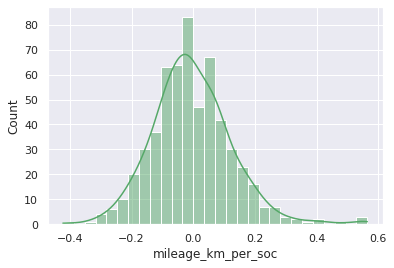

In [313]:
sns.histplot(residuals, color="g", kde=True,label="Fitted Values" )

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

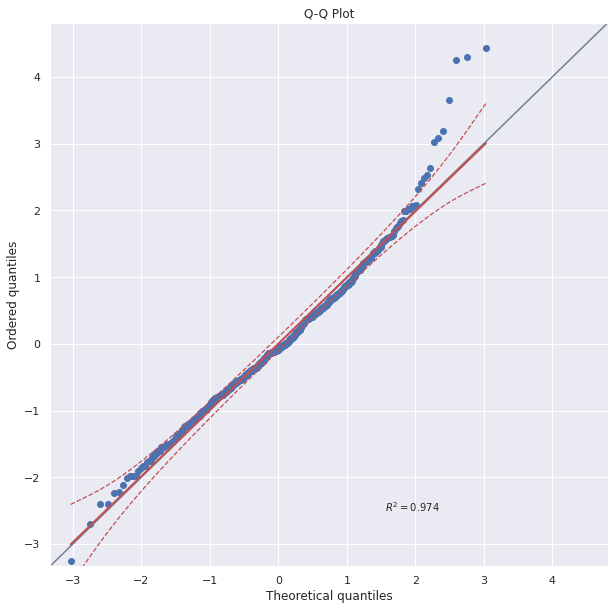

In [314]:
fig, ax = plt.subplots(figsize=(10,10))
pg.qqplot(residuals,dist='norm',ax=ax)

We plot the theoretical quantiles or basically known as the standard normal variate (a normal distribution with mean=0 and standard deviation=1)on the x-axis and the ordered values for the random variable which we want to find whether it is Gaussian distributed or not, on the y-axis. This gives a beautiful and a smooth straight line like structure from each point plotted on the graph.

Now we have to focus on the ends of the straight line. At the ends of the curve formed from the points are not falling on a straight line but ont he top there is indeed are scattering significantly from the position, clearly signifies that our ordered values which we wanted to calculate are right skewed.

If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot.

In [315]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
print('residual standard error: ', np.sqrt(np.sum(residuals**2)/(len(x)-x.shape[1]-1)))

Mean of Residuals -0.004050422817045233
residual standard error:  0.05744527160016823


The mean is close to zero, so all good here

Linear assumption is incorrect. Histogram of residuals is symmetric and normally distributed with slight right skewed.

In the above model summary, all features have a p-value less than 0.05 and are statistically significant. Also, we would also be interested to know the presence of all significant interaction terms.

In classical regression, there are no normality assumptions about the distribution of predictors in the regression or even the response (Y). All assumptions are based on residuals. It is assumed that the residuals should be approximately normal. Transforming the predictors or outcome might alter the distribution of residuals. WE need  to  look for the influential observations using Cook's distance to see if any of your extreme values have high influence. Transformations are good whenever we have a meaningful interpretation, for instance, the log transform and reciprocal are often useful depending on context.

Due to lack of time to perfom further analysis will fit in few good models to check how the perform, deeper analysis, which would show cases my story telling ability is time constrained and with the remaining time I will show case some modelling techniques I have picked up. 

In [333]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = corr_df.drop(['mileage_km_per_soc','a/b'],axis=1)
# Choose the response variable 'y' 
y = corr_df.mileage_km_per_soc
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [334]:
#Non scaled variables ? 
x_train = x_train.iloc[:,[2,3]].copy()

In [335]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),
                              columns = x_train.columns)
x_train_scaled.head()

,no_of_riding_sessions,no_of_charging_sessions
0,2.021367,1.951830
1,-0.078772,0.064104
2,-1.466691,-1.235240
3,-1.025080,-0.732663
4,0.558740,0.431843


In [336]:
ordinal_prior_scaled_ls= list(set(X.columns)-set(x_train.columns))

In [337]:
x_train_scaled[ordinal_prior_scaled_ls]=X[ordinal_prior_scaled_ls]

In [338]:
x_train_scaled.shape

(2278, 5)

In [339]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1,shuffle=True)

def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [340]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, y_train)

In [341]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation.style.highlight_min(color = "red").highlight_max(color = "green")

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.145515,0.001133
1,Ridge Regression,0.145514,0.001148
2,Lasso Regression,0.145641,-0.000828
3,K Neighbors Regressor,0.160685,-0.218879
4,Decision Tree Regressor,0.218326,-1.156075
5,Random Forest Regressor,0.154457,-0.128340
6,Gradient Boosting Regressor,0.148787,-0.038237
7,Adaboost Regressor,0.164280,-0.245371


Ridge Regressor has the lowest RMSE, highest R-Squared

In [342]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [343]:
from sklearn.model_selection import GridSearchCV
best_ridge= GridSearchCV(Ridge(),param_grid=ridge_params).fit(x_train_scaled, y_train).best_estimator_

In [344]:
best_ridge

Ridge(alpha=230)

In [345]:
x_test.reset_index(inplace=True)

In [346]:
x_train_scaled

,no_of_riding_sessions,no_of_charging_sessions,age_scaled,model_type,charging_behavior
0,2.021367,1.951830,0.261905,4,2
1,-0.078772,0.064104,0.261905,4,2
2,-1.466691,-1.235240,0.261905,4,1
3,-1.025080,-0.732663,0.261905,4,3
4,0.558740,0.431843,0.261905,4,3
...,...,...,...,...,...
2273,0.040761,0.064104,0.452381,3,3
2274,1.261001,1.044741,0.452381,3,2
2275,0.530517,1.179578,0.857143,1,1
2276,-0.289616,-1.039112,0.452381,3,2


In [347]:
x_test_scaled

,model_type,no_of_riding_sessions,age_scaled,charging_behavior
0,4,9.220801,0.047619,2
1,4,8.227906,0.047619,2
2,4,16.514287,0.190476,1
3,4,6.609855,0.238095,2
4,4,7.173721,0.333333,3
...,...,...,...,...
565,4,14.197533,0.166667,2
566,2,10.838851,0.071429,1
567,4,10.630466,0.119048,2
568,4,9.551766,0.047619,2


In [348]:
x_test.iloc[:,[3,4]]

,no_of_riding_sessions,no_of_charging_sessions
0,861,104
1,780,148
2,1456,127
3,648,93
4,694,59
...,...,...
565,1267,113
566,993,272
567,976,159
568,888,78


In [354]:
x_test_scaled = pd.DataFrame(scaler.transform(x_test.iloc[:,[3,4]]),
                             columns = x_test.iloc[:,[3,4]].columns)
x_test_scaled[['age_scaled','model_type','charging_behavior']]=x_test[['age_scaled','model_type','charging_behavior']]
clf=best_ridge
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test_scaled)))


Test RMSE:  0.1326060983059526
Test R^2:  -0.0007467487160872643


Further process after hyprparameter tuning would be perform regression model diagnostics(VIF), then validate the model and fianlly deploy the model 

No time to fine tune the assignment, I had my convocation on saturday and been busy with work. 

Looking forward to hear you feedback 

Regards
Sumanth
9900348848
slackroo.github.io

### --- Assignment End

## Further study with trasformations and model fitting

In [ ]:
df['no_of_charging_sessions'].skew()

In [ ]:
log_charging=np.log(df['no_of_charging_sessions'])
log_charging.skew()


And just like that, we’ve gone from the skew coefficient of 1.7 to -0.6. But before jumping to conclusions we should also make a quick visualization:



In [ ]:
sns.histplot(log_charging,kde=True)

Well, it’s not normally distributed for sure, but is a lot better than what we had before!

### Transformations

square root transformation

In [ ]:
sqrt_charging= np.sqrt(df['no_of_charging_sessions'])
sqrt_charging.skew()

In [ ]:
sns.histplot(sqrt_charging,kde=True)

The skew coefficient went from 1.7 to 0.5, which still is a notable difference. 

Nevertheless, let’s visualize how everything looks now:

In [ ]:
from scipy.special import boxcox, inv_boxcox

In [ ]:
df['no_of_charging_sessions_boxcox'], param = stats.boxcox(df['no_of_charging_sessions'])
print('Optimal lambda', param)

In [ ]:
#inv_boxcox(df['no_of_charging_sessions_boxcox'],param)

Wow! The skew dropped from 1.7 to -0.01 only. Still, let’s see how the transformed variable looks like:



In [ ]:
sns.histplot(boxcox_charging,kde=True)

In [ ]:
df['age_scaled'].skew()

In [ ]:
log_age=np.sqrt(df['age_scaled'])
log_age.skew()


In [ ]:
sns.histplot(log_age,kde=True)

## Transformation of response variable 

In [ ]:
df['mileage_km_per_soc'].skew()

In [ ]:
log_charging=np.log(df['mileage_km_per_soc'])
log_charging.skew()


Ok so we’ve gone from the skew coefficient of 1.27 to -11.6. But before jumping to conclusions we should also make a quick visualization

In [ ]:
sns.histplot(log_charging,kde=True)

Well, it’s not normally distributed for sure, but is a lot better than what we had before!

square root transformation

In [ ]:
sqrt_charging= np.sqrt(df['mileage_km_per_soc'])
sqrt_charging.skew()

In [ ]:
sns.histplot(sqrt_charging,kde=True)

The skew coefficient went from 1.7 to 0.5, which still is a notable difference. 

Nevertheless, let’s visualize how everything looks now:

In [ ]:
from scipy.special import boxcox, inv_boxcox

In [ ]:
df['mileage_km_per_soc_boxcox'], param = stats.boxcox(df['mileage_km_per_soc'])
print('Optimal lambda', param)

In [ ]:
#inv_boxcox(df['mileage_km_per_soc_boxcox'],param)

Wow! The skew dropped from 1.7 to -0.01 only. Still, let’s see how the transformed variable looks like:



In [ ]:
sns.histplot(boxcox_charging,kde=True)

In [ ]:
df['age_scaled'].skew()

In [ ]:
log_age=np.sqrt(df['age_scaled'])
log_age.skew()


In [ ]:
sns.histplot(log_age,kde=True)